<a href="https://colab.research.google.com/github/putrimaharani355/University-Learning-Analytics-dataset/blob/main/Exploratory_data_analysis_OULAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis OULAD

Nama : Putri Maharani Isnainiyah

NIM : 20201037311355

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **Assessments**

In [72]:
# Memuat data assessments.csv dan menampilkan 5 data teratas
data = pd.read_csv('assessments.csv')
df = pd.DataFrame(data)
df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [73]:
#menampilkan 5 data terbawah
df.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [74]:
#Menampilkan tentang ringkasan statistika
df.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [75]:
#Menampilkan tentang info data berupa nama column, jumlah data, dan tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


<ipython-input-76-55fe0b574fbb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

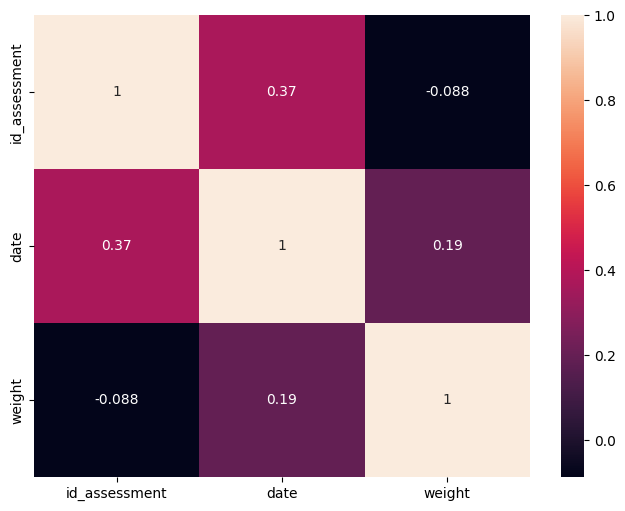

In [76]:
#memvisualisasikan korelasi antara berbagai kolom numerik dalam DataFrame
#Korelasi dengan nilai 1.0 menunjukkan bahwa kedua fitur memiliki korelasi yang kuat
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [77]:
#melihat summary null value
data.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [78]:
#menghapus baris yang memiliki nilai NaN / Null
data = df.dropna()

In [79]:
#melihat summary null value setelah dilakukan pengahapusan baris dengan nilai NaN
data.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [80]:
# pengecekan tipe data pada data
df.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [81]:
#melakukan transformasi dari data kategori menjadi data numerik (int)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype != 'int64' :
        df[column] = le.fit_transform(df[column])
df.dtypes

code_module          int64
code_presentation    int64
id_assessment        int64
assessment_type      int64
date                 int64
weight               int64
dtype: object

In [82]:
# Melakukan penskalaan pada kolom-kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# **Student Assessment**

In [83]:
# Memuat data studentAssessment.csv dan menampilkan 5 data teratas
data = pd.read_csv('studentAssessment.csv')
df = pd.DataFrame(data)
df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [85]:
#menampilkan 5 data terbawah
df.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


In [86]:
#Menampilkan tentang ringkasan statistika
df.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [87]:
#Menampilkan tentang info data berupa nama column, jumlah data, dan tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


<Axes: >

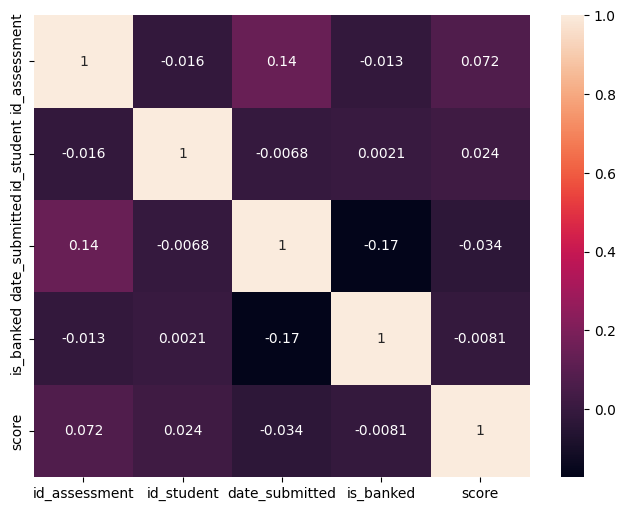

In [88]:
#memvisualisasikan korelasi antara berbagai kolom numerik dalam DataFrame
#Korelasi dengan nilai 1.0 menunjukkan bahwa kedua fitur memiliki korelasi yang kuat
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [89]:
#melihat summary null value
data.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [90]:
#menghapus baris yang memiliki nilai NaN / Null
data = df.dropna()
data.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [16]:
# pengecekan tipe data pada data
df.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [17]:
#melakukan transformasi dari data kategori menjadi data numerik (int)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype != 'int64' :
        df[column] = le.fit_transform(df[column])
df.dtypes

id_assessment     int64
id_student        int64
date_submitted    int64
is_banked         int64
score             int64
dtype: object

In [18]:
# Melakukan penskalaan pada kolom-kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# **Student Registration**

In [91]:
# Memuat data studentRegistration.csv dan menampilkan 5 data teratas
data = pd.read_csv('studentRegistration.csv')
df = pd.DataFrame(data)
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [92]:
#menampilkan 5 data terbawah
df.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [93]:
#Menampilkan tentang ringkasan statistika
df.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [94]:
#Menampilkan tentang info data berupa nama column, jumlah data, dan tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-95-55fe0b574fbb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

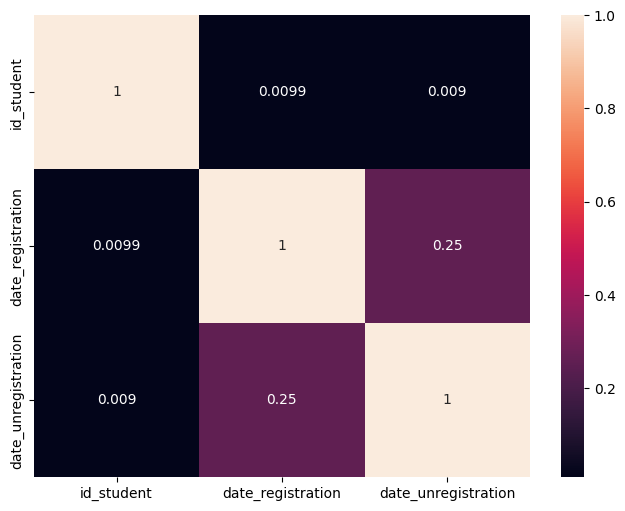

In [95]:
#memvisualisasikan korelasi antara berbagai kolom numerik dalam DataFrame
#Korelasi dengan nilai 1.0 menunjukkan bahwa kedua fitur memiliki korelasi yang kuat
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [26]:
#melihat summary null value
data.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [97]:
#menghapus baris yang memiliki nilai NaN / Null
data = df.dropna()
data.isna().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

In [28]:
# pengecekan tipe data pada data
df.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [29]:
#melakukan transformasi dari data kategori menjadi data numerik (int)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype != 'int64' :
        df[column] = le.fit_transform(df[column])
df.dtypes

code_module            int64
code_presentation      int64
id_student             int64
date_registration      int64
date_unregistration    int64
dtype: object

In [98]:
# Melakukan penskalaan pada kolom-kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# **Student Vle**

In [119]:
# Memuat data studentVle.csv dan menampilkan 5 data teratas
data = pd.read_csv('studentVle.csv')
df = pd.DataFrame(data)
df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [120]:
#menampilkan 5 data terbawah
df.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [121]:
#Menampilkan tentang ringkasan statistika
df.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [122]:
#Menampilkan tentang info data berupa nama column, jumlah data, dan tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


<ipython-input-123-5b14e8deff29>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

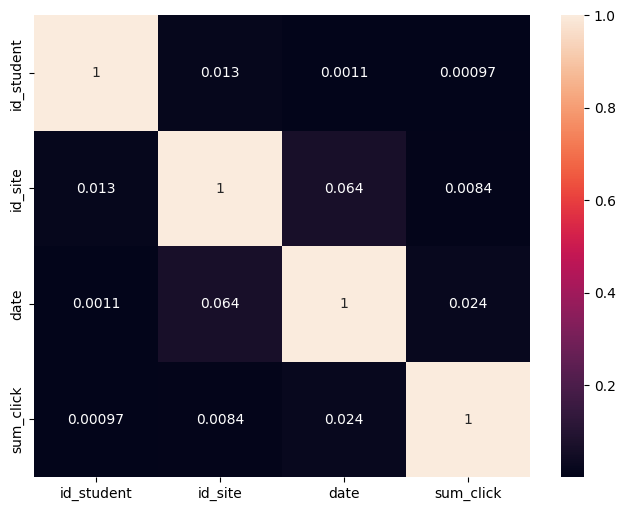

In [123]:
#memvisualisasikan korelasi antara berbagai kolom numerik dalam DataFrame
#Korelasi dengan nilai 1.0 menunjukkan bahwa kedua fitur memiliki korelasi yang kuat
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [124]:
#melihat summary null value
data.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [125]:
#menghapus baris yang memiliki nilai NaN / Null
data = df.dropna()
data.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [126]:
# pengecekan tipe data pada data
df.dtypes

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object

In [127]:
#melakukan transformasi dari data kategori menjadi data numerik (int)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype != 'int64' :
        df[column] = le.fit_transform(df[column])
df.dtypes

code_module          int64
code_presentation    int64
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtype: object

In [128]:
# Melakukan penskalaan pada kolom-kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# **Vle**

In [133]:
# Memuat data vle.csv dan menampilkan 5 data teratas
data = pd.read_csv('vle.csv')
df = pd.DataFrame(data)
df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [139]:
#menampilkan 5 data terbawah
df.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [140]:
#Menampilkan tentang ringkasan statistika
df.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [135]:
#Menampilkan tentang info data berupa nama column, jumlah data, dan tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


<ipython-input-136-55fe0b574fbb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

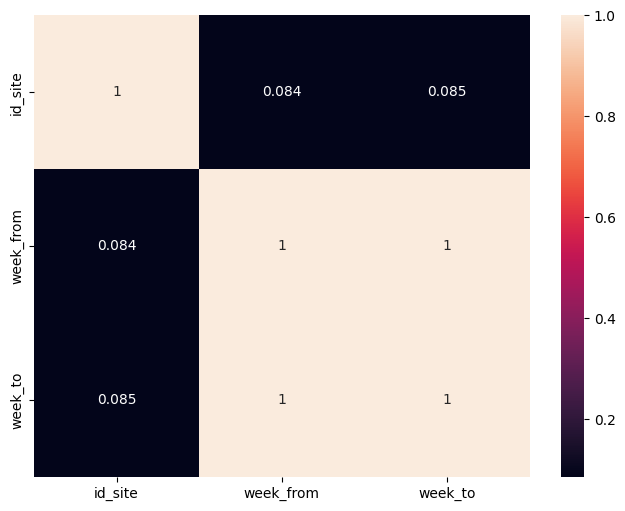

In [136]:
#memvisualisasikan korelasi antara berbagai kolom numerik dalam DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [137]:
#melihat summary null value
data.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [138]:
#menghapus baris yang memiliki nilai NaN / Null
data = df.dropna()
data.isna().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

In [43]:
# pengecekan tipe data pada data
df.dtypes

id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

In [45]:
#melakukan transformasi dari data kategori menjadi data numerik (int)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype != 'int64':
        df[column] = le.fit_transform(df[column])
df.dtypes

id_site              int64
code_module          int64
code_presentation    int64
activity_type        int64
week_from            int64
week_to              int64
dtype: object

In [46]:
# Melakukan penskalaan pada kolom-kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])